<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Python_Sliece_and_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Slice and Dice - vagy Hunterwasser

Egy régi projektem most pythonban.

Keressen két változó közé egy olyan harmadik változót, amelynek két kategóriájában az eredeti összefüggés vagy nem áll fenn, vagy fenn áll de két ellentétes módon.

Az utóbbira mutatok most egy példát.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-5, 5, 0.01)

In [4]:
y = x**2

In [29]:
n = x.size
z = np.zeros(n)
half_n = (int)(n/2)
z[:half_n] = 0
z[half_n:] = 1

u = np.zeros(n)
counter = 0
for i in range(n):
  if(counter < 5): u[i] = 0
  if(counter >= 5): u[i] = 1
  counter += 1
  if(counter >= 10): counter = 0

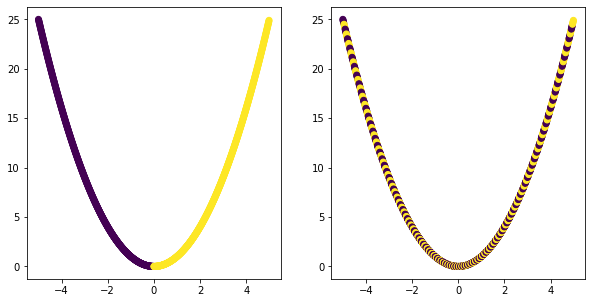

In [34]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.scatter(x, y, c=z)
ax = fig.add_subplot(1,2,2)
ax.scatter(x, y, c=u)
plt.show()

z0 score =  0.9377346662313054
z1 score =  0.9372659197176569


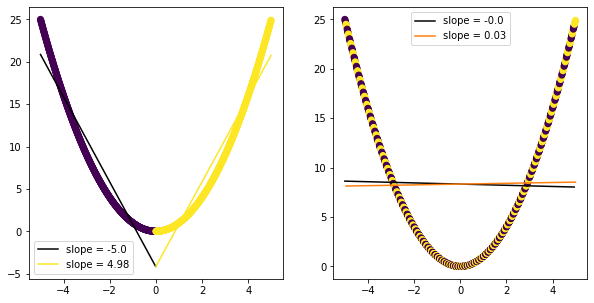

In [90]:
from sklearn.linear_model import LinearRegression

z0 = z[z == 0]
z1 = z[z == 1]
x0 = x[z == 0]
x1 = x[z == 1]
y0 = y[z == 0]
y1 = y[z == 1]

model_z0 = LinearRegression().fit(x0.reshape(-1, 1), y0)
pred_y0  = model_z0.predict(x0.reshape(-1, 1))

model_z1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
pred_y1  = model_z1.predict(x1.reshape(-1, 1))

print('z0 score = ', model_z0.score(x0.reshape(-1, 1), y0))
print('z1 score = ', model_z1.score(x1.reshape(-1, 1), y1))

u0 = u[u == 0]
u1 = u[u == 1]
a0 = x[u == 0]
a1 = x[u == 1]
b0 = y[u == 0]
b1 = y[u == 1]

model_u0 = LinearRegression().fit(a0.reshape(-1, 1), b0)
pred_b0  = model_u0.predict(a0.reshape(-1, 1))

model_u1 = LinearRegression().fit(a1.reshape(-1, 1), b1)
pred_b1  = model_u1.predict(a1.reshape(-1, 1))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.scatter(x, y, c=z)
ax.plot(x0, pred_y0, c='black', label='slope = ' + str(model_z0.coef_[0])[:4])
# ax.plot(x1, pred_y1, c='#ff7f0e', label='slope = ' + str(model_z1.coef_[0])[:4])
ax.plot(x1, pred_y1, c='#fde725', label='slope = ' + str(model_z1.coef_[0])[:4])
ax.legend()
ax = fig.add_subplot(1,2,2)
ax.scatter(x, y, c=u)
ax.plot(a0, pred_b0, c='black', label='slope = ' + str(model_u0.coef_[0])[:4])
ax.plot(a1, pred_b1, c='#ff7f0e', label='slope = ' + str(model_u1.coef_[0])[:4])
ax.legend()
plt.show()

In [ ]:
# Az a lényeg, hogy ez az algoritmus a következő képen működik

# Ki kell választanunk két változót (x, y)

# Ez az alap változó pár. Azt akarjuk vizsgálni, hogy van e olyan harmadik (z)
# változó ami jelentősen módosítja az x->y között fennáló kapcsolatot

# Elöször ki kell választani az összes olyan változót ami bináris, dichotom
# vagy kategória értékű

# Mindegyik kategoriájában megvizsgálni az x->y kapcsolatot.

# Az illeszkedések summajat venni <- és ezt összehasonlítani az eredeit
# > x -> y változó illeszkedésével. Minnél nagyobb a kettő közötti különbség
# > annár jobban differenciálja ez a harmadik (z) változó az eredeti x->y
# > változó közötti kapcsolatot